# 1.- Importar Librerias Relevantes

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# 2.- Cargar dataframes

In [2]:
path = 'C:/Users/leona/OneDrive/Documentos/Universidad/8vo Semestre/Proyecto' # use your path
df_matrix = pd.read_csv(f"{path}/Analisis variables/matriz_desercion_1.csv", encoding='utf-8-sig')

C:\Users\leona\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_matrix

,cat_periodo,codigo_unico,mrun,gen_alu,fec_nac_alu,anio_ing_carr_ori,tipo_inst_1,region_sede,area_conocimiento,desertor_1,region_colegio,tipo_ensenanza_colegio,prom_notas_media,dependencia_colegio
0,2015,I498S6C132J2V1,37.0,1,197808,2015,Centros de Formación Técnica,Biobío,Tecnología,0.0,NaN,NaN,NaN,NaN
1,2015,I111S14C309J2V1,118.0,1,199102,2015,Institutos Profesionales,Metropolitana,Administración y Comercio,0.0,13,310.0,4.975,3
2,2015,I106S3C64J4V1,253.0,1,198404,2015,Institutos Profesionales,Metropolitana,Administración y Comercio,1.0,NaN,NaN,NaN,NaN
3,2015,I221S1C57J1V1,370.0,2,198910,2015,Centros de Formación Técnica,Metropolitana,Administración y Comercio,1.0,13,310.0,5.100,3
4,2015,I176S8C59J2V1,533.0,2,198309,2015,Institutos Profesionales,Coquimbo,Salud,0.0,4,510.0,5.200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746649,2021,I106S6C295J4V1,26380151.0,2,199603,2020,Institutos Profesionales,Metropolitana,Arte y Arquitectura,0.0,NaN,NaN,NaN,NaN
2746650,2021,I260S44C120J1V1,26380152.0,2,200302,2021,Centros de Formación Técnica,Magallanes,Administración y Comercio,1.0,NaN,NaN,NaN,NaN
2746651,2021,I152S10C341J4V1,26453499.0,2,199208,2021,Institutos Profesionales,Metropolitana,Educación,1.0,NaN,NaN,NaN,NaN
2746652,2021,I152S10C349J4V1,26453942.0,2,196501,2020,Institutos Profesionales,Metropolitana,Administración y Comercio,0.0,NaN,NaN,NaN,NaN


In [4]:
df_matrix['desertor_1'].isna().sum()

0

In [5]:
df_matrix['prom_notas_media'].isna().sum()

349092

In [6]:
df_matrix['region_colegio'].isna().sum()

349092

Por ahora solo eliminare los NaNs, los cuales representan alrededor de un 13% del total de datos.

Luego se podría rellenar los NaNs de la region por la región donde estudian (supuesto igual fuerte) y las notas se podrían reemplazar por la media/mediana o utilizando una tecnica más sotisficada (como las que enseñaron en clases).

In [7]:
df_matrix_2 = df_matrix[pd.to_numeric(df_matrix['region_colegio'], errors='coerce').notnull()] #habian strings asi que se sacan
df_matrix_2["region_colegio"] = df_matrix_2["region_colegio"].astype(float)

C:\Users\leona\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df_matrix_2 = df_matrix_2[df_matrix_2['prom_notas_media'].notna()]

Se chequea que no hay nans

In [13]:
df_matrix_2['prom_notas_media'].isna().sum()

0

In [14]:
df_matrix_2['region_colegio'].isna().sum()

0

In [32]:
import statsmodels.api as sm  # Librería para realizar las regresiones
import matplotlib.pyplot as plt
y = df_matrix_2["desertor_1"]
x_1 = df_matrix_2["prom_notas_media"]
x_1 = sm.add_constant(x_1) 
x_2 = df_matrix_2["region_colegio"]
x_2 = sm.add_constant(x_2) 
x_3 = df_matrix_2[["prom_notas_media", "region_colegio"]]
x_3 = sm.add_constant(x_3) 

# Regresiones Lineales

In [26]:
# Realizamos una regresión lineal con los datos
res_1 = sm.OLS(y, x_1).fit() 
res_1.summary()  # Se imprime un resumen de los resultados de la regresión

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desertor_1   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                 2.498e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:30:05   Log-Likelihood:            -9.9269e+05
No. Observations:             2396740   AIC:                         1.985e+06
Df Residuals:                 2396738   BIC:                         1.985e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6452      0.003    210.221      0.000       0.639       0.651
prom_notas_media    -0.0896      0.001   -158.057      0.000      -0.091      -0.089
==============================================================================
Omnibus:                   698564.666   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1493240.673
Skew:                           1.811   Prob(JB):                         0.00
Kurtosis:                       4.354   Cond. No.                         72.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

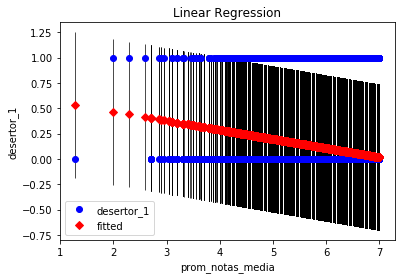

In [36]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res_1, "prom_notas_media", ax=ax)
ax.set_ylabel("desertor_1")
ax.set_xlabel("prom_notas_media")
ax.set_title("Linear Regression")
plt.show()

In [27]:
# Realizamos una regresión lineal con los datos
res_2 = sm.OLS(y, x_2).fit() 
res_2.summary()  # Se imprime un resumen de los resultados de la regresión

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desertor_1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     66.60
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           3.34e-16
Time:                        21:30:09   Log-Likelihood:            -1.0051e+06
No. Observations:             2396740   AIC:                         2.010e+06
Df Residuals:                 2396738   BIC:                         2.010e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1662      0.001    268.023      0.000       0.165       0.167
region_colegio    -0.0005   6.02e-05     -8.161      0.000      -0.001      -0.000
==============================================================================
Omnibus:                   711992.535   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1542047.927
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                       4.383   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

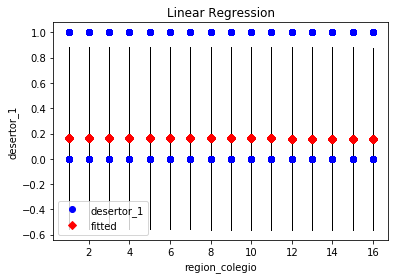

In [37]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res_2, "region_colegio", ax=ax)
ax.set_ylabel("desertor_1")
ax.set_xlabel("region_colegio")
ax.set_title("Linear Regression")
plt.show()

In [28]:
# Realizamos una regresión lineal con los datos
res_3 = sm.OLS(y, x_3).fit() 
res_3.summary()  # Se imprime un resumen de los resultados de la regresión

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desertor_1   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                 1.262e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:30:10   Log-Likelihood:            -9.9257e+05
No. Observations:             2396740   AIC:                         1.985e+06
Df Residuals:                 2396737   BIC:                         1.985e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6565      0.003    208.307      0.000       0.650       0.663
prom_notas_media    -0.0901      0.001   -158.632      0.000      -0.091      -0.089
region_colegio      -0.0009   5.99e-05    -15.712      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   698428.045   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1492747.826
Skew:                           1.811   Prob(JB):                         0.00
Kurtosis:                       4.353   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se puede notar que la region tiene un coeficiente muy bajo (cercano a 0), por lo que a priori se podria decir que no afecta en si alguien deserta o no.

Las notas de enseñanza media en cambio tienen un coeficiente mayor (en valor absoluto), este tiene signo negativo por lo que a mayor promedio, baja la probabilidad de que un estudiante deserte de la carrera.

# Logit

In [29]:
# Realizamos una regresión lineal con los datos
logit_1 = sm.Logit(y, x_1).fit() 
logit_1.summary()  # Se imprime un resumen de los resultados de la regresión

Optimization terminated successfully.
         Current function value: 0.436872
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             desertor_1   No. Observations:              2396740
Model:                          Logit   Df Residuals:                  2396738
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Sep 2022   Pseudo R-squ.:                 0.01212
Time:                        21:30:47   Log-Likelihood:            -1.0471e+06
converged:                       True   LL-Null:                   -1.0599e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1189      0.024     88.363      0.000       2.072       2.166
prom_notas_media    -0.7032      0.004   -156.320      0.000      -0.712      -0.694
====================================================================================
"""

In [30]:
# Realizamos una regresión lineal con los datos
logit_2 = sm.Logit(y, x_2).fit() 
logit_2.summary()  # Se imprime un resumen de los resultados de la regresión

Optimization terminated successfully.
         Current function value: 0.442217
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             desertor_1   No. Observations:              2396740
Model:                          Logit   Df Residuals:                  2396738
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Sep 2022   Pseudo R-squ.:               3.138e-05
Time:                        21:31:00   Log-Likelihood:            -1.0599e+06
converged:                       True   LL-Null:                   -1.0599e+06
Covariance Type:            nonrobust   LLR p-value:                 3.479e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6124      0.005   -353.902      0.000      -1.621      -1.603
region_colegio    -0.0036      0.000     -8.160      0.000      -0.004      -0.003
==================================================================================
"""

In [31]:
# Realizamos una regresión lineal con los datos
logit_3 = sm.Logit(y, x_3).fit() 
logit_3.summary()  # Se imprime un resumen de los resultados de la regresión

Optimization terminated successfully.
         Current function value: 0.436817
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             desertor_1   No. Observations:              2396740
Model:                          Logit   Df Residuals:                  2396737
Method:                           MLE   Df Model:                            2
Date:                Mon, 26 Sep 2022   Pseudo R-squ.:                 0.01224
Time:                        21:31:12   Log-Likelihood:            -1.0469e+06
converged:                       True   LL-Null:                   -1.0599e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.2097      0.025     89.731      0.000       2.161       2.258
prom_notas_media    -0.7072      0.005   -156.887      0.000      -0.716      -0.698
region_colegio      -0.0073      0.000    -16.393      0.000      -0.008      -0.006
====================================================================================
"""